In [38]:
import pandas as pd

In [39]:
data = pd.read_pickle('../data/processed/data.pkl')
data.columns

Index(['patientunitstayid', 'intubated', 'vent', 'dialysis', 'eyes', 'motor',
       'verbal', 'meds', 'urine', 'wbc', 'temperature', 'respiratoryrate',
       'sodium', 'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine',
       'albumin', 'pao2', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2',
       'gender', 'age', 'admitdiagnosis', 'aids', 'hepaticfailure', 'lymphoma',
       'metastaticcancer', 'leukemia', 'immunosuppression', 'cirrhosis',
       'electivesurgery', 'activetx', 'readmit', 'diabetes',
       'actualicumortality', 'actualhospitalmortality', 'actualhospitallos'],
      dtype='object')

In [40]:
# remove all null values
data_remove_null = data.dropna()
len(data_remove_null)

12808

In [41]:
from sklearn.model_selection import train_test_split
X_total = data_remove_null.drop(['admitdiagnosis', 'actualicumortality', 'actualhospitalmortality', 'actualhospitallos'],axis=1)
y_total = data_remove_null['actualicumortality']
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, stratify=y_total, test_size=0.20, random_state=2022)
# X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.20, random_state=2022)

In [42]:
y_train.value_counts()

0    8516
1    1730
Name: actualicumortality, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2130
           1       0.00      0.00      0.00       432

    accuracy                           0.83      2562
   macro avg       0.42      0.50      0.45      2562
weighted avg       0.69      0.83      0.75      2562



/Users/mindongsung/work/20220329_python_lecture/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mindongsung/work/20220329_python_lecture/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mindongsung/work/20220329_python_lecture/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [45]:
# calculate roc_curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.38967136e-04,
        9.38967136e-04, 1.40845070e-03, 1.40845070e-03, 2.34741784e-03,
        2.34741784e-03, 2.81690141e-03, 3.75586854e-03, 3.75586854e-03,
        4.69483568e-03, 4.69483568e-03, 4.69483568e-03, 5.16431925e-03,
        5.16431925e-03, 6.57276995e-03, 6.57276995e-03, 7.04225352e-03,
        7.04225352e-03, 7.98122066e-03, 8.92018779e-03, 9.38967136e-03,
        9.38967136e-03, 9.85915493e-03, 9.85915493e-03, 1.03286385e-02,
        1.03286385e-02, 1.12676056e-02, 1.12676056e-02, 1.22065728e-02,
        1.22065728e-02, 1.31455399e-02, 1.31455399e-02, 1.36150235e-02,
        1.36150235e-02, 1.40845070e-02, 1.40845070e-02, 1.45539906e-02,
        1.45539906e-02, 1.54929577e-02, 1.54929577e-02, 1.59624413e-02,
        1.78403756e-02, 1.83098592e-02, 1.83098592e-02, 2.01877934e-02,
        2.06572770e-02, 2.06572770e-02, 2.11267606e-02, 2.11267606e-02,
        2.39436620e-02, 2.39436620e-02, 2.44131455e-02, 2.535211

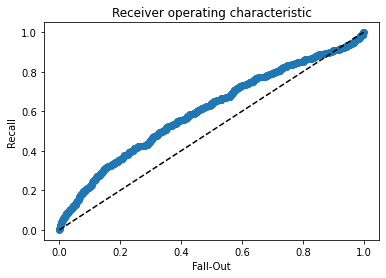

In [46]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") # o for circle
plt.plot([0, 1], [0, 1], 'k--', label="random guess") # k for black
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.show()

In [47]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.6031135889410537

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[2130,    0],
       [ 432,    0]])